<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/Analisis_de_componentes_principales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('sample_data/Data.csv')
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes
0,Lucia,7.0,6.5,9.2,8.6,8.0
1,Pedro,7.5,9.4,7.3,7.0,7.0
2,Ines,7.6,9.2,8.0,8.0,7.5
3,Luis,5.0,6.5,6.5,7.0,9.0
4,Andres,6.0,6.0,7.8,8.9,7.3
5,Ana,7.8,9.6,7.7,8.0,6.5
6,Carlos,6.3,6.4,8.2,9.0,7.2
7,Jose,7.9,9.7,7.5,8.0,6.0
8,Sonia,6.0,6.0,6.5,5.5,8.7
9,Maria,6.8,7.2,8.7,9.0,7.0


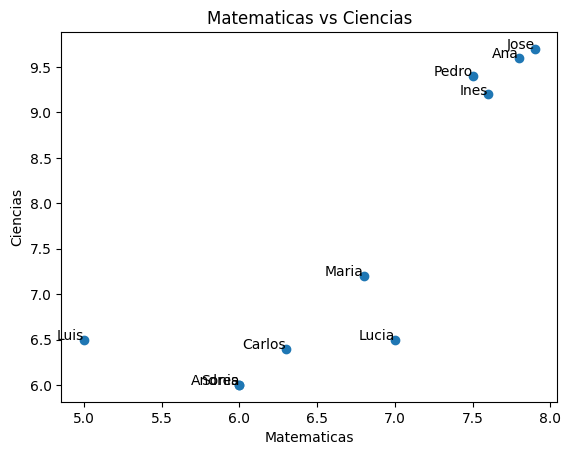

In [44]:
plt.scatter(df['Matematicas'], df['Ciencias'])
plt.xlabel('Matematicas')
plt.ylabel('Ciencias')
plt.title('Matematicas vs Ciencias')
# Agregar etiquetas con los valores de Columna3
for i in range(len(df)):
    plt.text(df['Matematicas'][i], df['Ciencias'][i], df['Nombre'][i], fontsize=10, ha='right')

plt.show()

Estandarizacion de los datos
===
Estandarización:
* Los datos se estandarizan para que todas las variables tengan media 0 y desviación estándar 1. $$Z=\frac{x_i-\mu}{\sigma}$$ Esto es importante para PCA porque depende de la escala de los datos.

PCA:
* Se especifica n_components=2 para reducir a dos componentes principales.
fit_transform: Ajusta el modelo PCA y transforma los datos originales a los nuevos componentes.

* Cada fila muestra la proyección de los datos en las nuevas dimensiones (combinaciones lineales de las variables originales).
* Varianza explicada:
Indica qué porcentaje de la varianza total de los datos es capturado por cada componente principal.

Resultados:

* df_pca: Contiene los datos transformados en las nuevas dimensiones.
* explained_variance_ratio_: Muestra la proporción de la varianza explicada por cada componente principal.


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include='number')

# Estandarizar los datos numéricos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(columnas_numericas)
# Crear un nuevo DataFrame con los datos estandarizados
df_estandarizado = pd.DataFrame(datos_estandarizados, columns=columnas_numericas.columns)

pca = PCA(n_components=2)
datos_pca = pca.fit_transform(df_estandarizado)
df_pca = pd.DataFrame(datos_pca, columns=['PC1', 'PC2'])

# Concatenar con las columnas no numéricas si es necesario
df_resultado = pd.concat([df.select_dtypes(exclude='number'),df_estandarizado], axis=1)

# Mostrar el resultado
print(f'---Promedios\n{columnas_numericas.mean()}')
print(f'---Desviacion estandar\n{columnas_numericas.std()}')
print((7-6.79)/0.951548)
print(f'---Data estandarizado\n{df_resultado}')
print(f'---Matriz de covarianza\n{columnas_numericas.cov()}')
print(f'---Eigen Valores propios\n{pca.explained_variance_}')
print(f'---Porcentaje de varianza\n{pca.explained_variance_ratio_} entre los dos componentes principales explican el {sum(pca.explained_variance_ratio_)}')
print(f'---Eigen vectores de los Componentes principales\n{pca.components_}')
print(f'---Data pca lo que represente cada componente por cada registro\n{df_pca}')

---Promedios
Matematicas    6.79
Ciencias       7.65
Espanol        7.74
Historia       7.90
Deportes       7.42
dtype: float64
---Desviacion estandar
Matematicas    0.951548
Ciencias       1.609865
Espanol        0.860491
Historia       1.121507
Deportes       0.928320
dtype: float64
0.22069301811364217
---Data estandarizado
   Nombre  Matematicas  Ciencias   Espanol  Historia  Deportes
0   Lucia     0.232631 -0.752986  1.788485  0.657923  0.658581
1   Pedro     0.786514  1.145849 -0.538996 -0.845901 -0.476903
2    Ines     0.897290  1.014894  0.318497  0.093989  0.090839
3    Luis    -1.982900 -0.752986 -1.518987 -0.845901  1.794065
4  Andres    -0.875135 -1.080371  0.073499  0.939889 -0.136258
5     Ana     1.118843  1.276803 -0.049000  0.093989 -1.044645
6  Carlos    -0.542805 -0.818463  0.563495  1.033878 -0.249807
7    Jose     1.229620  1.342280 -0.293998  0.093989 -1.612388
8   Sonia    -0.875135 -1.080371 -1.518987 -2.255735  1.453420
9   Maria     0.011078 -0.294647  1.175990

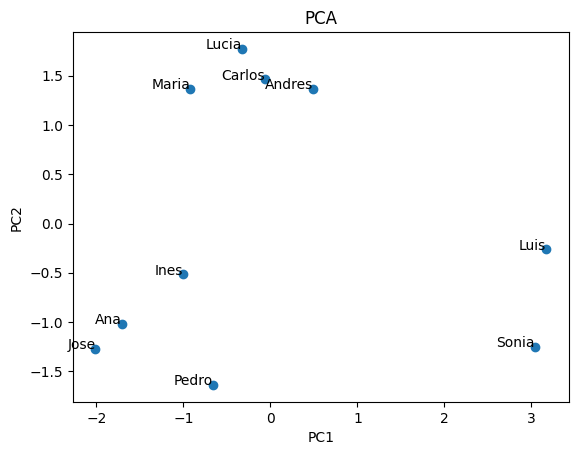

In [48]:
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
# Agregar etiquetas con los valores de Columna3
for i in range(len(df_resultado)):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_resultado['Nombre'][i], fontsize=10, ha='right')

plt.show()

K-means:
===
* n_clusters=2: Se agrupan los datos en 2 clústeres.
* fit_predict: Ajusta el modelo y asigna una etiqueta de clúster a cada punto.

Visualización:
* Los puntos se agrupan en el plano de los componentes principales, y cada clúster tiene un color diferente.

Salida esperada
* DataFrame con clústeres:
Incluye las columnas Componente1, Componente2 y la etiqueta de clúster asignada (Cluster).

Gráfico:
* Muestra los puntos agrupados según los clústeres identificados por k-means.

DataFrame con clústeres asignados:
        PC1       PC2  Cluster
0 -0.323063  1.772525        1
1 -0.665441 -1.638702        0
2 -1.002547 -0.515692        0
3  3.172095 -0.262782        2
4  0.488868  1.365402        1
5 -1.708633 -1.021700        0
6 -0.067586  1.462336        1
7 -2.011855 -1.275865        0
8  3.042030 -1.254881        2
9 -0.923869  1.369359        1


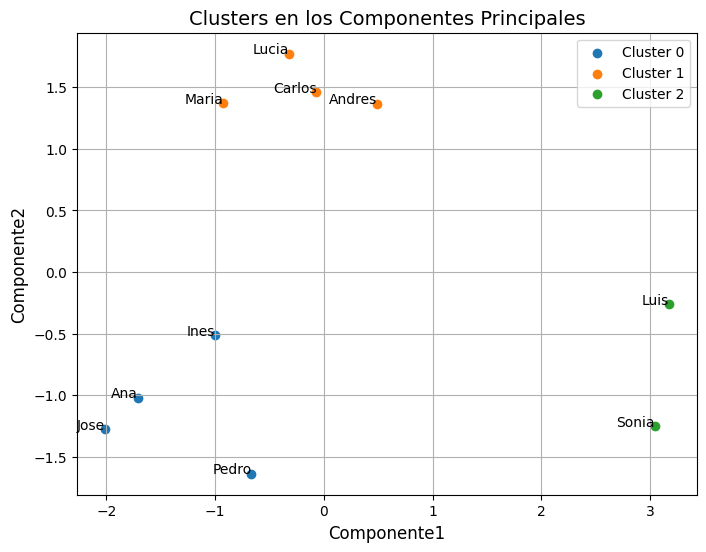

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# Mostrar los resultados
print("DataFrame con clústeres asignados:")
print(df_pca)

# Graficar los clústeres
plt.figure(figsize=(8, 6))
for cluster_id in set(df_pca['Cluster']):
    cluster = df_pca[df_pca['Cluster'] == cluster_id]
    plt.scatter(cluster['PC1'], cluster['PC2'], label=f'Cluster {cluster_id}')

# Agregar etiquetas con los valores de Columna3
for i in range(len(df_resultado)):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], df_resultado['Nombre'][i], fontsize=10, ha='right')

# Personalizar el gráfico
plt.title('Clusters en los Componentes Principales', fontsize=14)
plt.xlabel('Componente1', fontsize=12)
plt.ylabel('Componente2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

No es posible aplicar directamente el Análisis de Componentes Principales (PCA) sobre columnas con datos categóricos, ya que PCA requiere datos numéricos. Los datos categóricos no tienen una estructura inherente que permita cálculos algebraicos como la varianza y la covarianza necesarios para PCA.

Sin embargo, puedes convertir los datos categóricos en una representación numérica antes de aplicar PCA. Hay varios enfoques para hacerlo:

1. Codificación One-Hot (One-Hot Encoding):
Convierte cada categoría en una columna binaria (0 o 1), aumentando la dimensionalidad.

Este método es adecuado cuando las categorías no tienen un orden lógico.

   Categorical1_A  Categorical1_B  Categorical1_C  Categorical2_X  \
0            True           False           False            True   
1           False            True           False           False   
2            True           False           False            True   
3           False           False            True           False   
4           False            True           False           False   

   Categorical2_Y  Categorical2_Z  
0           False           False  
1            True           False  
2           False           False  
3           False            True  
4            True           False  
Componentes principales:
    Componente1  Componente2
0  2.041241e+00    -0.816497
1 -2.041241e+00    -0.816497
2  2.041241e+00    -0.816497
3  2.492857e-15     3.265986
4 -2.041241e+00    -0.816497


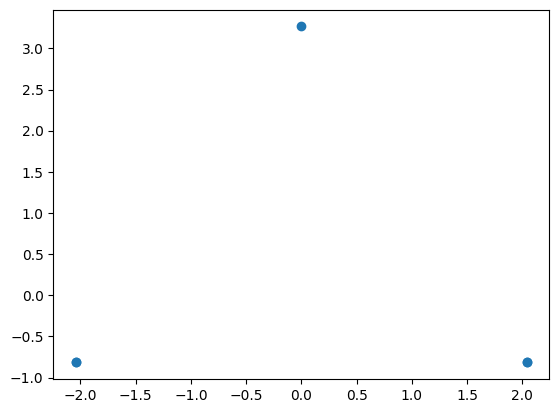

In [40]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Crear un DataFrame con datos categóricos
data = {
    'Categorical1': ['A', 'B', 'A', 'C', 'B'],
    'Categorical2': ['X', 'Y', 'X', 'Z', 'Y']
}
df = pd.DataFrame(data)

# Convertir los datos categóricos en variables numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df)
print(df_encoded)

# Estandarizar los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(df_encoded)

# Aplicar PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(datos_estandarizados)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(componentes_principales, columns=['Componente1', 'Componente2'])

print("Componentes principales:")
print(df_pca)
plt.scatter(df_pca['Componente1'], df_pca['Componente2'])


2. Codificación Ordinal (Ordinal Encoding):
Asigna valores numéricos a las categorías (por ejemplo, A=0, B=1, C=2).

Útil si las categorías tienen un orden lógico.

[[0. 0.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]]
Componentes principales (codificación ordinal):
   Componente1   Componente2
0    -1.511858  1.125972e-16
1     0.377964 -9.104941e-18
2    -1.511858  3.641976e-17
3     2.267787  1.023796e-16
4     0.377964 -9.104941e-18


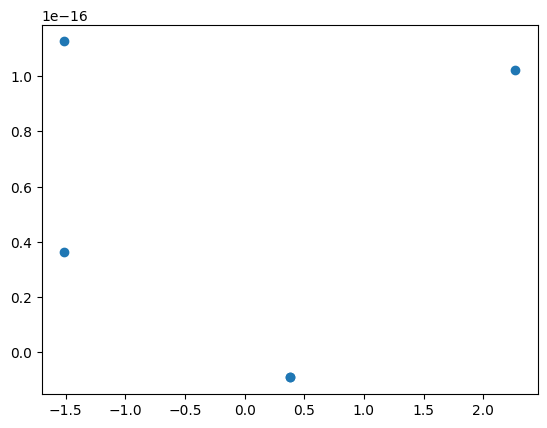

In [41]:
from sklearn.preprocessing import OrdinalEncoder

# Convertir datos categóricos a números usando codificación ordinal
encoder = OrdinalEncoder()
datos_codificados = encoder.fit_transform(df)
print(datos_codificados)

# Aplicar PCA (proceso similar al ejemplo anterior)
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos_codificados)

pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(datos_estandarizados)

df_pca = pd.DataFrame(componentes_principales, columns=['Componente1', 'Componente2'])
print("Componentes principales (codificación ordinal):")
print(df_pca)
plt.scatter(df_pca['Componente1'], df_pca['Componente2'])